In [34]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [27]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [28]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [29]:
train = pd.DataFrame()
train['image'], train ['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [30]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [31]:
test = pd.DataFrame()
test['image'], test ['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [32]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [41]:
from tqdm.notebook import tqdm

In [44]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [47]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [48]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [49]:
x_train = train_features/255.0
x_test = test_features/255.0

In [52]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [55]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [57]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [62]:
model = Sequential()
# convolution layers
model.add(Conv2D(128,kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(7, activation='softmax'))

In [64]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [72]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100


ValueError: in user code:

    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 7, 7) and (None, 7) are incompatible


In [74]:
model.save("my_model.h5")
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [75]:
from keras.models import model_from_json

In [6]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
import json
from keras.models import model_from_json

model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [7]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [32]:
def ef(image_path):
    img = load_img(image_path, grayscale=True, target_size=(48, 48))  # Load and resize the image
    feature = np.array(img)  # Convert image to numpy array
    feature = feature.reshape(1, 48, 48, 1)  # Reshape for model input
    return feature

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of fear
1/1 [==============================] - 0s 98ms/step
model prediction is  fear


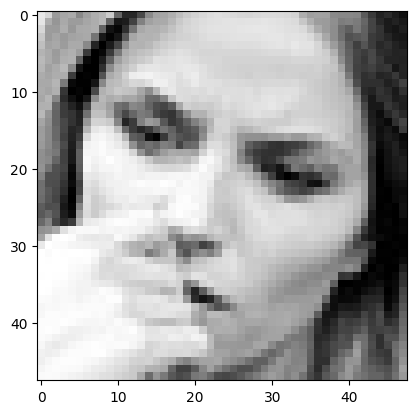

In [50]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()  # Show the plot

In [52]:
image_path = 'images/train/happy/7.jpg'
print("Original image is of happy")

img = ef(image_path)  # Process the image
pred = model.predict(img)  # Make a prediction
pred_label = label[pred.argmax()]  # Retrieve the predicted label

print("Predicted emotion:", pred_label)
    

Original image is of happy
1/1 [==============================] - 0s 57ms/step
Predicted emotion: happy


original image is of fear
1/1 [==============================] - 0s 58ms/step
model prediction is  happy


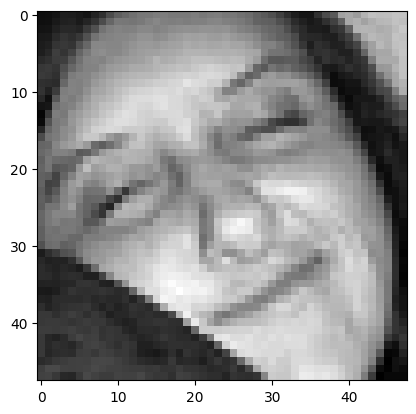

In [53]:
image = 'images/train/happy/16.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()  # Show the plot